In [1]:
# import the required libraries

import os
import glob as gb
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import matplotlib.image as implt
from tqdm import tqdm

In [2]:
import os

# Specify the directory path
directory_path = r"C:\Users\Kusha\Desktop\masters\final_sem\project\final_data"
class_names = ['wide', 'six', 'out', 'four', 'no_ball', 'byes', 'leg_byes', 'no_action', 'not_out']

for name in class_names:
  # List all files in the directory
  dest_path = f"{directory_path}/{name}"
  print(dest_path)
  files_in_directory = os.listdir(dest_path)

  # Filter out directories within the given directory
  file_count = sum(1 for item in files_in_directory if os.path.isfile(os.path.join(dest_path, item)))

  print(f"There are {file_count} files in the directory.")

C:\Users\Kusha\Desktop\masters\final_sem\project\final_data/wide
There are 389 files in the directory.
C:\Users\Kusha\Desktop\masters\final_sem\project\final_data/six
There are 487 files in the directory.
C:\Users\Kusha\Desktop\masters\final_sem\project\final_data/out
There are 227 files in the directory.
C:\Users\Kusha\Desktop\masters\final_sem\project\final_data/four
There are 131 files in the directory.
C:\Users\Kusha\Desktop\masters\final_sem\project\final_data/no_ball
There are 296 files in the directory.
C:\Users\Kusha\Desktop\masters\final_sem\project\final_data/byes
There are 37 files in the directory.
C:\Users\Kusha\Desktop\masters\final_sem\project\final_data/leg_byes
There are 86 files in the directory.
C:\Users\Kusha\Desktop\masters\final_sem\project\final_data/no_action
There are 172 files in the directory.
C:\Users\Kusha\Desktop\masters\final_sem\project\final_data/not_out
There are 46 files in the directory.


In [3]:
final_data_path = 'final_data'

In [4]:
print('====================> Final Data <========================')
for folder in os.listdir(final_data_path):
    trainFiles=gb.glob(pathname=final_data_path + '/' + folder +'/*.jpg')
    trainFiles.extend(gb.glob(pathname=final_data_path + '/' + folder +'/*.png'))
    trainFiles.extend(gb.glob(pathname=final_data_path + '/' + folder +'/*.jpeg'))
    print(f'{len(trainFiles):4} images are founnd in {folder} folder.')

====================> Final Data <========================
  35 images are founnd in byes folder.
 131 images are founnd in four folder.
  84 images are founnd in leg_byes folder.
  46 images are founnd in not_out folder.
 172 images are founnd in no_action folder.
 296 images are founnd in no_ball folder.
 227 images are founnd in out folder.
 487 images are founnd in six folder.
 389 images are founnd in wide folder.


In [5]:
# initializing the class variables

class_names = ['wide', 'six', 'out', 'four', 'no_ball', 'byes', 'leg_byes', 'no_action', 'not_out']
class_labels = {class_names[i]:i for i in range(len(class_names))}
class_labels

{'wide': 0,
 'six': 1,
 'out': 2,
 'four': 3,
 'no_ball': 4,
 'byes': 5,
 'leg_byes': 6,
 'no_action': 7,
 'not_out': 8}

## Loading dataset

In [6]:
# Loading the dataset

def loading_dataset(data_dir_path):
    images, labels = [], []
    for class_name in class_names:
      try:
          file_path = os.path.join(data_dir_path, class_name)
          # print(type(os.listdir(file_path)))
          for img in os.listdir(file_path):
            try:
              img_array = cv2.imread(os.path.join(file_path,img), cv2.IMREAD_COLOR)
              img_array = cv2.resize(img_array,(50,50))
              # img_array = cv2.convert('RGB')
              img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
              images.append(img_array)
              labels.append(class_labels[class_name])
            except Exception as ex:
              print(f"Exception: {ex} for {class_name}")
      except Exception as ex:
        print(f"Exception: {ex}")

    images, labels = np.array(images), np.array(labels)
    return (images,labels)

In [7]:
# Loading the dataset of trained and tested
(X, y) = loading_dataset(final_data_path)
# (X_test,Y_test) = loading_dataset(test_path)

print('Total Number of images = '+ str(y.shape[0]))
# print('Total Number of Test images = '+ str(Y_test.shape[0]))

Total Number of images = 1871


## Loading visuals

In [8]:
#visualizing the sample images

def visualize_sample_images(X, Y):

    fig,ax = plt.subplots(3,3,figsize = (8,8))
    for i in range(3):
        for j in range(3):
            index = np.random.randint(X.shape[0])
            ax[i][j].imshow(X[index])
            ax[i][j].set_title(class_names[Y[index]])

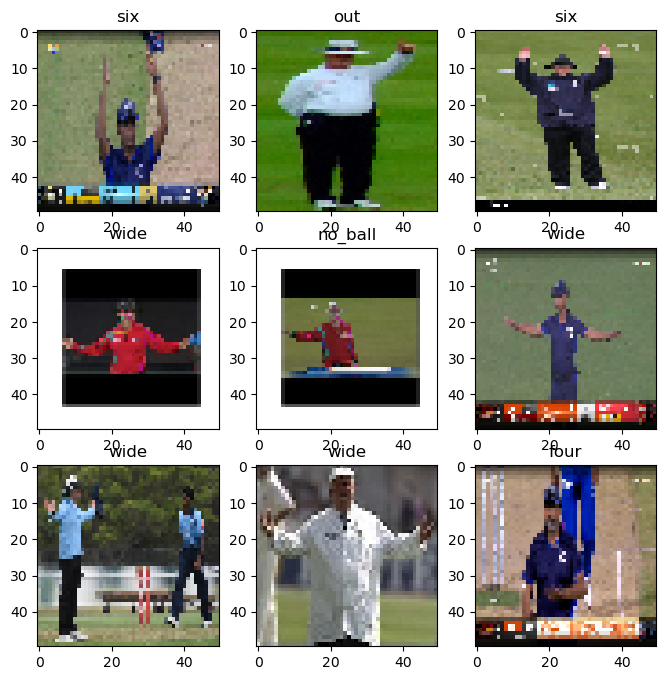

In [9]:
#visualizing the sample training images

visualize_sample_images(X, y)

In [10]:
labels_uniq = set(list(y))
class_labels_new = {}
for key, value in class_labels.items():
  if value in labels_uniq:
    class_labels_new[key] = value
class_labels_new

{'wide': 0,
 'six': 1,
 'out': 2,
 'four': 3,
 'no_ball': 4,
 'byes': 5,
 'leg_byes': 6,
 'no_action': 7,
 'not_out': 8}

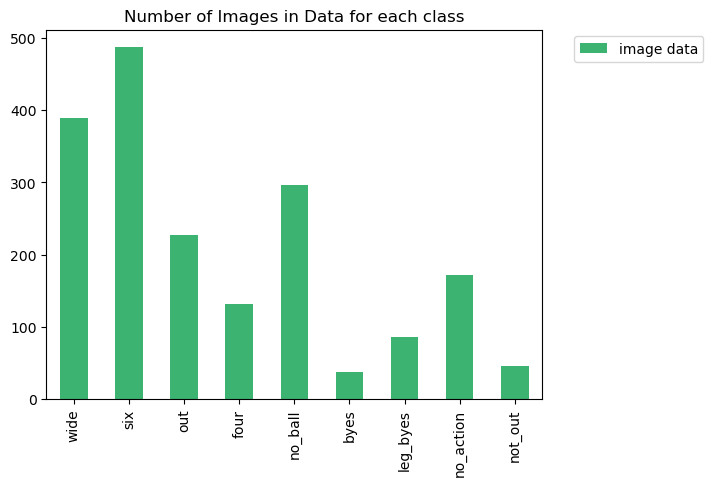

In [11]:
# Visualizing the boxplot for data for train, test for each class label

datatrain, CountImag = np.unique(y, return_counts=True)
#datatest, CountTestImag = np.unique(Y_test, return_counts=True)
pd.DataFrame({'image data': CountImag}, index=class_labels_new).plot.bar(color={'image data':'mediumseagreen'})
plt.title('Number of Images in Data for each class')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

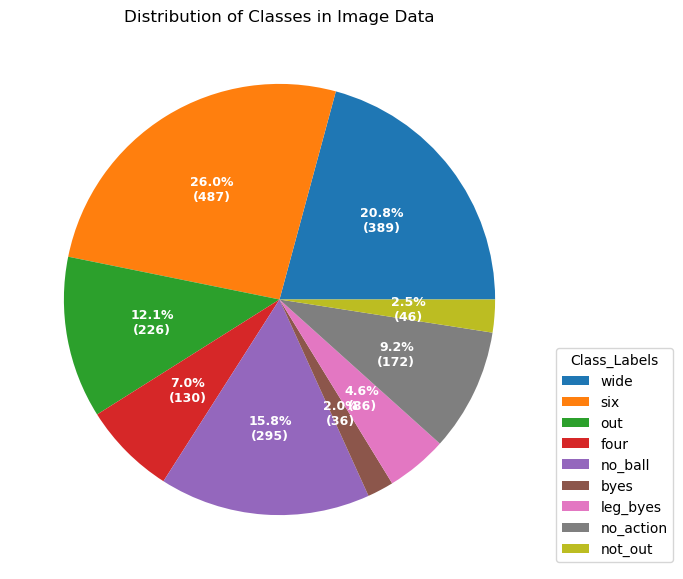

In [12]:
# Visualizing the pie chart data visualization for training data

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(9, 7), subplot_kw=dict(aspect="equal"))

class_names = list(class_labels_new.keys())
count_train = list(CountImag)

popln_pct, texts, autotexts = ax.pie(count_train, autopct=lambda pct: func(pct, count_train),
                                  textprops=dict(color="w"))

ax.legend(popln_pct, class_names,
          title="Class_Labels",
          loc="lower left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=9, weight="bold")

ax.set_title("Distribution of Classes in Image Data")

plt.show()

## Label encoding

In [13]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Encode labels as integers
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [81]:
# Assuming you've already fitted the LabelEncoder to your y_train data
# and encoded both y_train and y_test
# encoder = LabelEncoder()
# y_train_encoded = encoder.fit_transform(y_train)
# y_test_encoded = encoder.transform(y_test)

# Retrieve the mapping from encoded labels back to original labels
label_mapping = {label: original_label for label, original_label in enumerate(encoder.classes_)}

# Print the mapping
print("Label Mapping:")
for label, original_label in label_mapping.items():
    print(f"Encoded Label {label}: {original_label}")

Label Mapping:
Encoded Label 0: 0
Encoded Label 1: 1
Encoded Label 2: 2
Encoded Label 3: 3
Encoded Label 4: 4
Encoded Label 5: 5
Encoded Label 6: 6
Encoded Label 7: 7
Encoded Label 8: 8


# ReScaling

In [14]:
# X = X/255.0 # rescaling

# Data Augmentation

In [15]:
import numpy as np
import math
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation configuration
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Parameters
batch_size = 32
images_needed = 1500
number_of_batches = math.ceil(images_needed / batch_size)

# Assuming X and y are your existing image data and labels
X_augmented = []
y_augmented = []

# Data generation loop
final_data_generator = data_augmentation.flow(X, y, batch_size=batch_size)
for _ in range(number_of_batches):
    X_batch, y_batch = next(final_data_generator)
    X_augmented.append(X_batch)
    y_augmented.append(y_batch)

# Convert lists to numpy arrays
X_augmented = np.vstack(X_augmented)
y_augmented = np.concatenate(y_augmented)

# Append augmented data to original data (optional)
X_total = np.concatenate((X, X_augmented), axis=0)
y_total = np.concatenate((y, y_augmented), axis=0)

# Now X_total and y_total include the original and augmented images and labels
print(f'Total number of images after augmentation: {X_total.shape[0]}')

Total number of images after augmentation: 3375


# Split train test

In [16]:
from sklearn.model_selection import train_test_split


test_size = 0.2  # 20% of the data will be used for the test set

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_total, y_total, test_size=test_size, random_state=42
)

# Modeling --> AlexNet

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def AlexNet_Model():
    model = Sequential([
        # First Convolutional Layer
        Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), padding='same', input_shape=(50, 50, 3)),
        Activation('relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'),

        # Second Convolutional Layer
        Conv2D(filters=256, kernel_size=(5, 5), padding='same'),
        Activation('relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'),

        # Third Convolutional Layer
        Conv2D(filters=384, kernel_size=(3, 3), padding='same'),
        Activation('relu'),
        BatchNormalization(),

        # Fourth Convolutional Layer
        Conv2D(filters=384, kernel_size=(3, 3), padding='same'),
        Activation('relu'),
        BatchNormalization(),

        # Fifth Convolutional Layer
        Conv2D(filters=256, kernel_size=(3, 3), padding='same'),
        Activation('relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'),

        # Flattening the outputs from the convolutional layers to feed into the dense layers
        Flatten(),

        # First Dense Layer
        Dense(units=4096, activation='relu'),
        Dropout(0.5),

        # Second Dense Layer
        Dense(units=4096, activation='relu'),
        Dropout(0.5),

        # Output Layer: 9 gestures
        Dense(units=9, activation='softmax')
    ])

    return model

In [18]:
cnn_model = AlexNet_Model()

In [19]:
# applying adam optimiser with metrics as accuracy
cnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
cnn_model.summary() # summarizing our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 96)        34944     
                                                                 
 activation (Activation)     (None, 13, 13, 96)        0         
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         614656    
                                                                 
 activation_1 (Activation)   (None, 7, 7, 256)         0

In [21]:
import tensorflow as tf

tf.keras.utils.plot_model(cnn_model,show_shapes=True,show_layer_names=True,
                          show_layer_activations=True, rankdir='TB', expand_nested=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [22]:
# training the model
cnn_model_train = cnn_model.fit(X_train, y_train, batch_size= 64, epochs=40)

Epoch 1/40
43/43 [==============================] - 28s 606ms/step - loss: 4.0560 - accuracy: 0.2300
Epoch 2/40
43/43 [==============================] - 26s 603ms/step - loss: 2.0183 - accuracy: 0.2519
Epoch 3/40
43/43 [==============================] - 26s 603ms/step - loss: 1.9268 - accuracy: 0.2741
Epoch 4/40
43/43 [==============================] - 26s 604ms/step - loss: 1.8536 - accuracy: 0.2967
Epoch 5/40
43/43 [==============================] - 26s 604ms/step - loss: 1.8260 - accuracy: 0.3085
Epoch 6/40
43/43 [==============================] - 26s 599ms/step - loss: 1.7598 - accuracy: 0.3437
Epoch 7/40
43/43 [==============================] - 26s 600ms/step - loss: 1.7404 - accuracy: 0.3693
Epoch 8/40
43/43 [==============================] - 26s 602ms/step - loss: 1.6735 - accuracy: 0.3885
Epoch 9/40
43/43 [==============================] - 26s 605ms/step - loss: 1.6007 - accuracy: 0.4219
Epoch 10/40
43/43 [==============================] - 26s 601ms/step - loss: 1.6074 - accura

In [70]:
# evaluating the model
cnn_model.evaluate(X_test, y_test, verbose=1)

22/22 [==============================] - 2s 38ms/step - loss: 2.6210 - accuracy: 0.5378


[2.6210005283355713, 0.5377777814865112]

# K Fold Cross Validation --> AlexNet

In [24]:
# 10-Fold cross Validation

from keras.callbacks import ModelCheckpoint, EarlyStopping

def KFoldCrossValidation(K_Folds, X, Y, cnn_model):
    folds_data = []
    for i in range(K_Folds):
        print("Training on Fold: ",i+1)
        folds_data.append(cnn_model.fit(X, Y, epochs=17, callbacks=[EarlyStopping(monitor='val_loss', patience=2, verbose=1)], verbose=1, validation_split=0.1))
        print("======================================")

    return folds_data

In [25]:
cnn_fold_model = KFoldCrossValidation(10, X_train, y_train, cnn_model)

Training on Fold:  1
Epoch 1/17
76/76 [==============================] - 36s 476ms/step - loss: 0.7940 - accuracy: 0.7901 - val_loss: 2.0258 - val_accuracy: 0.5889
Epoch 2/17
76/76 [==============================] - 36s 473ms/step - loss: 1.2833 - accuracy: 0.7070 - val_loss: 1.9277 - val_accuracy: 0.4778
Epoch 3/17
76/76 [==============================] - 36s 476ms/step - loss: 0.7714 - accuracy: 0.7605 - val_loss: 1.7759 - val_accuracy: 0.5519
Epoch 4/17
76/76 [==============================] - 36s 478ms/step - loss: 0.7637 - accuracy: 0.8066 - val_loss: 1.4342 - val_accuracy: 0.5963
Epoch 5/17
76/76 [==============================] - 36s 476ms/step - loss: 0.6888 - accuracy: 0.8140 - val_loss: 2.1610 - val_accuracy: 0.4519
Epoch 6/17
76/76 [==============================] - 36s 475ms/step - loss: 0.6268 - accuracy: 0.8123 - val_loss: 1.6968 - val_accuracy: 0.5259
Epoch 6: early stopping
Training on Fold:  2
Epoch 1/17
76/76 [==============================] - 36s 476ms/step - loss: 0

In [26]:
datatest_acc, testAccuracy = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy after 10-Fold Cross Validation :', round(testAccuracy*100,2))

22/22 [==============================] - 1s 27ms/step - loss: 2.6210 - accuracy: 0.5378
Test Accuracy after 10-Fold Cross Validation : 53.78


In [35]:
from joblib import dump
import tensorflow as tf
import pickle

# data is the object you are pickling (e.g., a trained model)
with open('alexnetcrossmodel.pkl', 'wb') as file:
    pickle.dump(cnn_model, file, protocol=pickle.HIGHEST_PROTOCOL)

In [38]:
with open('alexnetcrossmodel.pkl', 'rb') as file:
    data = pickle.load(file)
    

In [67]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [69]:
import keras as k
print(k.__version__)

2.12.0


In [68]:
pip --version

pip 22.3.1 from C:\Users\Kusha\anaconda3\lib\site-packages\pip (python 3.10)Note: you may need to restart the kernel to use updated packages.




In [40]:
data.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 96)        34944     
                                                                 
 activation (Activation)     (None, 13, 13, 96)        0         
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         614656    
                                                                 
 activation_1 (Activation)   (None, 7, 7, 256)         0

# Accuracy vs Loss with range of epochs --> AlexNet

In [41]:
# visualizing the images data based on accuracy and loss vs epochs

def visualize_accuracy_loss(data):
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.plot(data.history['accuracy'],'go-', label = "Accuracy")
    plt.plot(data.history['loss'],'yo-', label = "Loss")
    plt.ylabel("accuracy & loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.legend()
    plt.show()

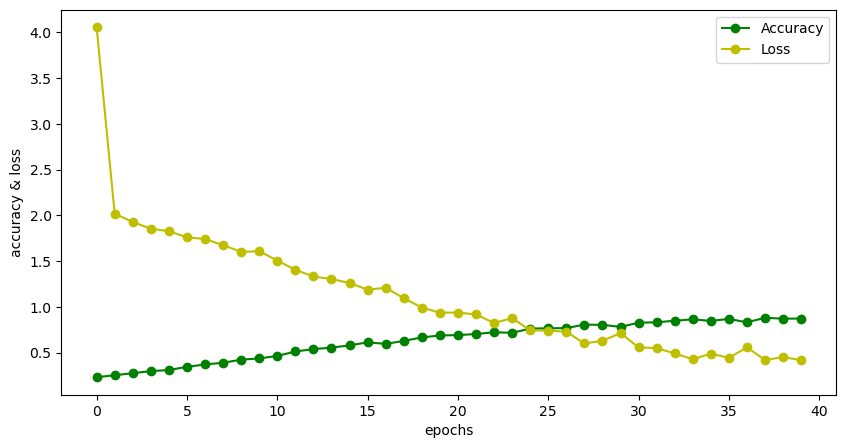

In [42]:
visualize_accuracy_loss(cnn_model_train)

# Confusion Matrix

22/22 [==============================] - 1s 26ms/step


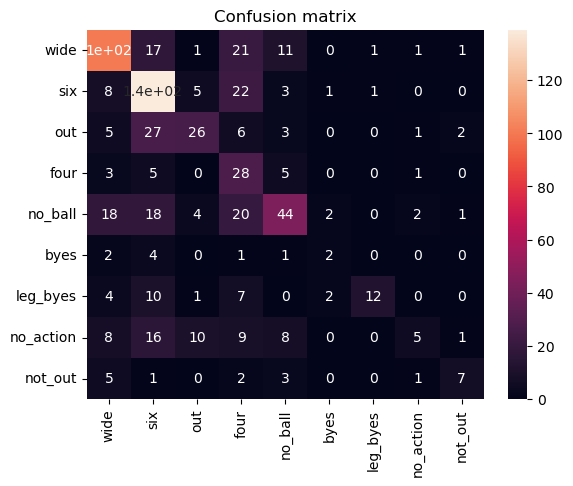

In [46]:
# Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

cnn_pred_stats = cnn_model.predict(X_test)
cnn_pred_labels = np.argmax(cnn_pred_stats, axis = 1)

CM = confusion_matrix(y_test, cnn_pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [72]:
images = []
img = cv2.imread(str("wide.jpg"))
img = cv2.resize(img,(50,50))
images.append(img)

In [74]:
pred_img = np.array(images)
cnn_preds = cnn_model.predict(pred_img)
print('Prediction Shape is {}'.format(cnn_preds.shape))

1/1 [==============================] - 0s 488ms/step
Prediction Shape is (1, 9)


In [80]:
np.argmax(cnn_preds[i])

0

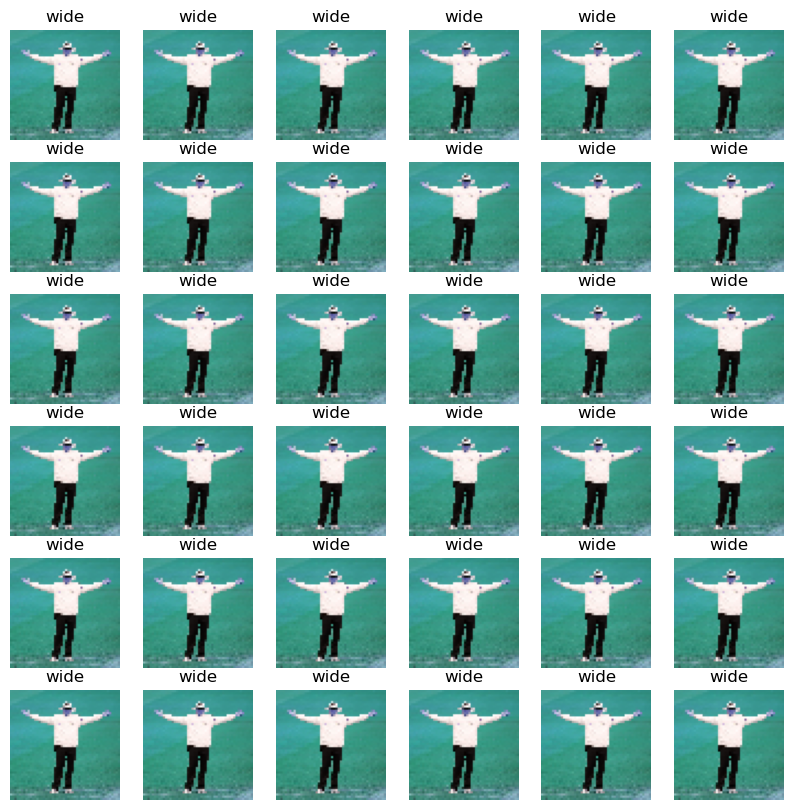

In [78]:
# displaying the outputs of our pred_data
class_label_data = dict([(value, key) for key, value in class_labels.items()])

plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(pred_img),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(pred_img[i])
    plt.axis('off')
    plt.title(class_label_data.get(np.argmax(cnn_preds[i])))

# Modeling --> ResNet

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, Add, BatchNormalization, GlobalAveragePooling2D, Flatten, Dense, Layer

class ResNet(Model):
    def __init__(self, input_shape, num_classes=9):
        super(ResNet, self).__init__()
        # Define the input layer outside the model initialization
        inputs = Input(shape=input_shape)

        # Initial Layers
        self.conv1 = Conv2D(64, kernel_size=7, strides=2, padding='same', kernel_initializer='he_normal', name='conv1')
        self.bn1 = BatchNormalization(name='bn1')
        self.relu1 = Activation('relu', name='relu1')

        # ResNet Blocks
        self.block1 = self.build_block(64, 2, name_prefix='block1')
        self.block2 = self.build_block(128, 2, name_prefix='block2')
        self.block3 = self.build_block(256, 2, name_prefix='block3')

        # Ending Layers
        self.global_pool = GlobalAveragePooling2D(name='global_pool')
        self.flatten = Flatten(name='flatten')
        self.fc1 = Dense(4096, activation='relu', name='fc1')
        self.fc2 = Dense(4096, activation='relu', name='fc2')
        self.classifier = Dense(num_classes, activation='softmax', name='classifier')

        # Define outputs using the call method
        outputs = self.call(inputs)
        # Create the Model
        super(ResNet, self).__init__(inputs=inputs, outputs=outputs)

    def call(self, inputs, training=False):
        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = self.relu1(x)

        x = self.process_block(x, self.block1, training=training)
        x = self.process_block(x, self.block2, training=training)
        x = self.process_block(x, self.block3, training=training)

        x = self.global_pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.classifier(x)
        return x

    def build_block(self, num_filters, num_convs, name_prefix):
        block = []
        for i in range(num_convs):
            conv = Conv2D(num_filters, kernel_size=3, padding='same', kernel_initializer='he_normal', name=f'{name_prefix}_conv{i+1}')
            bn = BatchNormalization(name=f'{name_prefix}_bn{i+1}')
            relu = Activation('relu', name=f'{name_prefix}_relu{i+1}')
            block.append((conv, bn, relu))
        return block

    def process_block(self, x, block, training=False):
        for (conv, bn, relu) in block:
            x = conv(x)
            x = bn(x, training=training)
            x = relu(x)
        return x

# Create an instance of the ResNet model
resnet_model = ResNet(input_shape=(50, 50, 3), num_classes=9)
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resnet_model.summary()

Model: "res_net_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 25, 25, 64)        9472      
                                                                 
 bn1 (BatchNormalization)    (None, 25, 25, 64)        256       
                                                                 
 relu1 (Activation)          (None, 25, 25, 64)        0         
                                                                 
 block1_conv1 (Conv2D)       (None, 25, 25, 64)        36928     
                                                                 
 block1_bn1 (BatchNormalizat  (None, 25, 25, 64)       256       
 ion)                                                            
                                                         

In [48]:
# training the model
resnet_model_train = resnet_model.fit(X_train, y_train, batch_size= 64, epochs=40)

Epoch 1/40
43/43 [==============================] - 76s 2s/step - loss: 2.0486 - accuracy: 0.2474
Epoch 2/40
43/43 [==============================] - 67s 2s/step - loss: 1.8971 - accuracy: 0.2693
Epoch 3/40
43/43 [==============================] - 67s 2s/step - loss: 1.8973 - accuracy: 0.2693
Epoch 4/40
43/43 [==============================] - 67s 2s/step - loss: 1.8638 - accuracy: 0.2796
Epoch 5/40
43/43 [==============================] - 68s 2s/step - loss: 1.8535 - accuracy: 0.2815
Epoch 6/40
43/43 [==============================] - 67s 2s/step - loss: 1.8154 - accuracy: 0.3011
Epoch 7/40
43/43 [==============================] - 67s 2s/step - loss: 1.7548 - accuracy: 0.3367
Epoch 8/40
43/43 [==============================] - 67s 2s/step - loss: 1.7256 - accuracy: 0.3415
Epoch 9/40
43/43 [==============================] - 67s 2s/step - loss: 1.6999 - accuracy: 0.3693
Epoch 10/40
43/43 [==============================] - 68s 2s/step - loss: 1.6369 - accuracy: 0.3907
Epoch 11/40
43/43 [

In [49]:
# evaluating the model
resnet_model.evaluate(X_test, y_test, verbose=1)

22/22 [==============================] - 3s 140ms/step - loss: 1.7709 - accuracy: 0.5793


[1.7708501815795898, 0.5792592763900757]

# K Fold Validation --> ResNet

In [50]:
# 10-Fold cross Validation

from keras.callbacks import ModelCheckpoint, EarlyStopping

def KFoldCrossValidation(K_Folds, X, Y, resnet_model):
    folds_data = []
    for i in range(K_Folds):
        print("Training on Fold: ",i+1)
        folds_data.append(resnet_model.fit(X, Y, epochs=17, callbacks=[EarlyStopping(monitor='val_loss', patience=2, verbose=1)], verbose=1, validation_split=0.1))
        print("======================================")

    return folds_data

In [51]:
resnet_fold_model = KFoldCrossValidation(10, X_train, y_train, resnet_model)

Training on Fold:  1
Epoch 1/17
76/76 [==============================] - 75s 987ms/step - loss: 0.8241 - accuracy: 0.7107 - val_loss: 1.8985 - val_accuracy: 0.5556
Epoch 2/17
76/76 [==============================] - 72s 949ms/step - loss: 0.6990 - accuracy: 0.7519 - val_loss: 1.7133 - val_accuracy: 0.5926
Epoch 3/17
76/76 [==============================] - 74s 979ms/step - loss: 0.6215 - accuracy: 0.7881 - val_loss: 3.4043 - val_accuracy: 0.4630
Epoch 4/17
76/76 [==============================] - 73s 955ms/step - loss: 0.5868 - accuracy: 0.7975 - val_loss: 1.0526 - val_accuracy: 0.6926
Epoch 5/17
76/76 [==============================] - 72s 946ms/step - loss: 0.4726 - accuracy: 0.8383 - val_loss: 1.5219 - val_accuracy: 0.6593
Epoch 6/17
76/76 [==============================] - 73s 958ms/step - loss: 0.6275 - accuracy: 0.7786 - val_loss: 1.3526 - val_accuracy: 0.6333
Epoch 6: early stopping
Training on Fold:  2
Epoch 1/17
76/76 [==============================] - 72s 951ms/step - loss: 0

In [52]:
datatest_acc, testAccuracy = resnet_model.evaluate(X_test, y_test)
print('Test Accuracy after 10-Fold Cross Validation :', round(testAccuracy*100,2))

22/22 [==============================] - 3s 144ms/step - loss: 3.2056 - accuracy: 0.4904
Test Accuracy after 10-Fold Cross Validation : 49.04


In [22]:
import pickle

# data is the object you are pickling (e.g., a trained model)
with open('resnet_model1.pkl', 'wb') as file:
    pickle.dump(resnet_model, file, protocol=pickle.HIGHEST_PROTOCOL)

# Save the model in HDF5 format
# resnet_model.save('resnet_model1.h5')

# # Alternatively, save as a TensorFlow SavedModel
# resnet_model.save('resnet_model1_saved_model')

In [23]:
with open('resnet_model1.pkl', 'rb') as file:
    data = pickle.load(file)
# from tensorflow.keras.models import load_model

# # If your custom model or any of its components need custom handling,
# # define a dictionary of custom objects
# custom_objects = {'ResNet': ResNet}  # Add other custom layers or functions if necessary

# # Load the model with custom objects
# loaded_model = load_model('resnet_model1.h5', custom_objects=custom_objects)

# Accuracy vs Loss --> ResNet

In [ ]:
# visualizing the images data based on accuracy and loss vs epochs

def visualize_accuracy_loss(data):
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.plot(data.history['accuracy'],'go-', label = "Accuracy")
    plt.plot(data.history['loss'],'yo-', label = "Loss")
    plt.ylabel("accuracy & loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.legend()
    plt.show()

In [ ]:
visualize_accuracy_loss(resnet_model_train)

# Prediction

In [102]:
import cv2
import numpy as np
from pathlib import Path

def load_pred_data(data_dir):
    images = []
    for path in Path(data_dir).iterdir():
        if path.name.endswith('.jpg'):
            img = cv2.imread(str(path))
            img = cv2.resize(img, (50, 50))
            # Convert image to float32
            img = img.astype(np.float32) / 255.0
            images.append(img)
    return images

pred_images = load_pred_data(r"C:\Users\Kusha\Downloads\pred")
pred_images = np.array(pred_images)
print(pred_images.shape)

(4, 50, 50, 3)


In [103]:
# predicting the image labels by using our trained cnn model

resnet_preds = resnet_model.predict(pred_images)
print('Prediction Shape is {}'.format(resnet_preds.shape))

1/1 [==============================] - 0s 81ms/step
Prediction Shape is (4, 9)


In [104]:
len(pred_images)

4

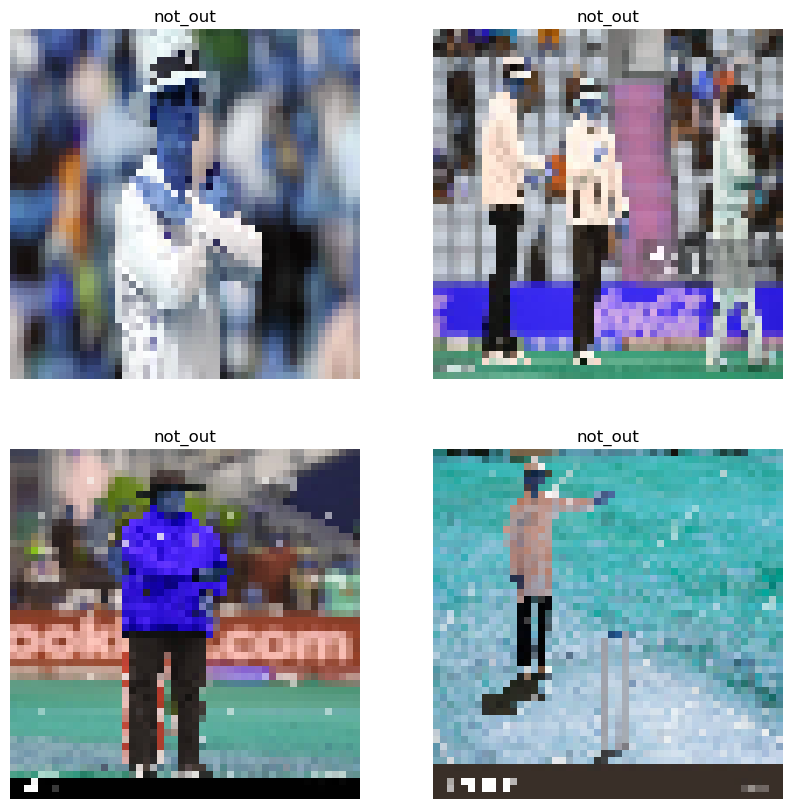

In [105]:
class_label_data = dict([(value, key) for key, value in class_labels.items()])

plt.figure(figsize=(10, 10))
for i in range(len(pred_images)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(pred_images[i])
    plt.axis('off')
    plt.title(class_label_data.get(np.argmax(resnet_preds[i])))

plt.show()